In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, chi2, RFECV, RFE, SelectFromModel
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Load training data and test data

# 5. Model Selection

In [4]:
X_data_3 = pd.read_csv('/content/drive/MyDrive/AML/task1/RandomForest_features_train.csv') # df stands for dataframe
y_data = pd.read_csv('/content/drive/MyDrive/AML/task1/RandomForest_target_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/AML/task1/RandomForest_features_test.csv')

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_data_3, y_data, test_size=0.2, random_state=1)
print("X_train shape: ", X_train.shape)

X_train shape:  (959, 70)


## ANN

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras import regularizers
# fix random seed for reproducibility

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [8]:
dropout=0.1

model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], kernel_regularizer = regularizers.l2(1), kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))

model.add(Dense(1, kernel_initializer='he_uniform'))
# Compile model
opt = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_squared_error', optimizer=opt, metrics=[coeff_determination])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                2130      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30)                0         
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 30)                0         
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                9

In [17]:
# Fit the model
history = model.fit(X_train, y_train, epochs=80, verbose=2, validation_split=0.1,
                    shuffle=True, steps_per_epoch=60, initial_epoch=0, validation_steps=5)

Epoch 1/80
60/60 - 0s - loss: 84.4652 - coeff_determination: 0.1542 - val_loss: 59.4864 - val_coeff_determination: 0.4523 - 497ms/epoch - 8ms/step
Epoch 2/80
60/60 - 0s - loss: 89.9782 - coeff_determination: 0.0681 - val_loss: 60.5162 - val_coeff_determination: 0.4420 - 180ms/epoch - 3ms/step
Epoch 3/80
60/60 - 0s - loss: 87.6552 - coeff_determination: 0.0258 - val_loss: 57.6461 - val_coeff_determination: 0.4726 - 155ms/epoch - 3ms/step
Epoch 4/80
60/60 - 0s - loss: 86.8769 - coeff_determination: 0.0448 - val_loss: 60.0004 - val_coeff_determination: 0.4431 - 141ms/epoch - 2ms/step
Epoch 5/80
60/60 - 0s - loss: 89.1959 - coeff_determination: 0.0942 - val_loss: 63.7419 - val_coeff_determination: 0.4092 - 188ms/epoch - 3ms/step
Epoch 6/80
60/60 - 0s - loss: 94.1980 - coeff_determination: -1.1366e-02 - val_loss: 61.7948 - val_coeff_determination: 0.4372 - 162ms/epoch - 3ms/step
Epoch 7/80
60/60 - 0s - loss: 82.6547 - coeff_determination: 0.1321 - val_loss: 58.3408 - val_coeff_determination

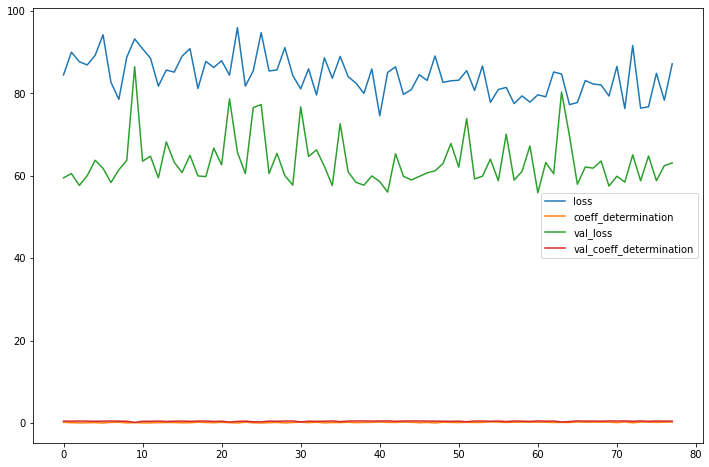

In [18]:
pd.DataFrame(history.history).plot(figsize=(12, 8))

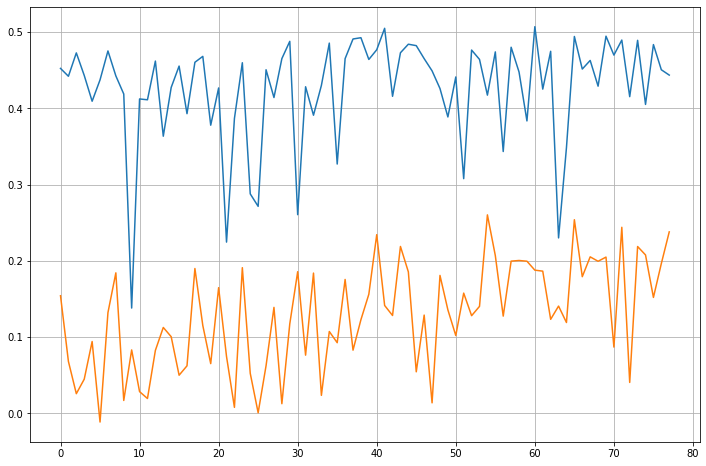

In [19]:
data = pd.DataFrame(history.history)
data["val_coeff_determination"].plot(figsize=(12, 8))
data["coeff_determination"].plot(figsize=(12, 8))
plt.grid(True)

In [20]:
y_pred = model.predict(X_valid)
r_score = r2_score(y_valid, y_pred)
print("Validation score:", r_score)

Validation score: 0.5211692545961925


# 6. Export the prediction

In [28]:
# rfr = grid.best_estimator_
rfr = model.fit(X_data_3, y_data)
y_predict = rfr.model.predict(X_test)

result_table = pd.DataFrame(data = y_predict, columns = ['y'])
result_table.tail()
result_table.to_csv('ann.csv', index = False)

38/38 [==============================] - 0s 4ms/step - loss: 73.4662 - coeff_determination: 0.3247
